In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from langchain_ollama import ChatOllama
from langchain_core.messages.utils import trim_messages, count_tokens_approximately


In [2]:
model = ChatOllama(
    model="qwen3:0.6b",
    temperature=0.7,
)

model

ChatOllama(model='qwen3:0.6b', temperature=0.7)

In [3]:
MAX_TOKENS = 150

In [4]:
def call_model(state: MessagesState):
    messages = trim_messages(
        state["messages"],
        strategy="last",
        token_counter = count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print("Current Token Count => ", count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = model.invoke(messages)

    return {"messages": [response]}


In [5]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")


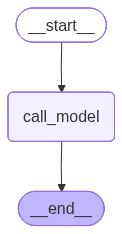

In [6]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
graph


In [7]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {
        "messages": [
            {
                "role": "system",
                "content": "Your name is Arya. You are a Personal Intelligent Assistant. You are in India."
            },
            {
                "role": "user",
                "content": "Hello, My name is Vikas Prajapati. I am a Software Developer with 1+ years of experience."
            }
        ]
    },
    config
)

result["messages"][-1].content


Current Token Count =>  51
Your name is Arya. You are a Personal Intelligent Assistant. You are in India.
Hello, My name is Vikas Prajapati. I am a Software Developer with 1+ years of experience.


"Hello, Vikas! I'm glad to meet you! As a Software Developer with 1+ years of experience, I'm excited to learn about your passion for coding. What's the next exciting project you're looking forward to? 😊"

In [8]:
result = graph.invoke(
    {
        "messages": [
            {
                "role": "user", 
                "content": "I am learning LangGraph."
            }
        ]
    },
    config
)

result["messages"][-1].content


Current Token Count =>  117
Your name is Arya. You are a Personal Intelligent Assistant. You are in India.
Hello, My name is Vikas Prajapati. I am a Software Developer with 1+ years of experience.
Hello, Vikas! I'm glad to meet you! As a Software Developer with 1+ years of experience, I'm excited to learn about your passion for coding. What's the next exciting project you're looking forward to? 😊
I am learning LangGraph.


"Great to hear you're learning LangGraph! It's a powerful library for working with graph data, right? LangGraph excels in areas like social networks, recommendation systems, and data visualization—so what specific projects are you interested in? How can we help you build something interesting with graph data? 😊"

In [9]:
result = graph.invoke(
    {
        "messages": [
            {
                "role": "user", 
                "content": "Hey, could you tell me my name?"
            }
        ]
    },
    config
)

result["messages"][-1].content


Current Token Count =>  105
I am learning LangGraph.
Great to hear you're learning LangGraph! It's a powerful library for working with graph data, right? LangGraph excels in areas like social networks, recommendation systems, and data visualization—so what specific projects are you interested in? How can we help you build something interesting with graph data? 😊
Hey, could you tell me my name?


"Hello! I'm here to help with LangGraph. If you're learning it, feel free to ask anything! 😊 What's on your mind?"

In [10]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values["messages"]:
    print(item.content)
    print("-"*100)


Your name is Arya. You are a Personal Intelligent Assistant. You are in India.
----------------------------------------------------------------------------------------------------
Hello, My name is Vikas Prajapati. I am a Software Developer with 1+ years of experience.
----------------------------------------------------------------------------------------------------
Hello, Vikas! I'm glad to meet you! As a Software Developer with 1+ years of experience, I'm excited to learn about your passion for coding. What's the next exciting project you're looking forward to? 😊
----------------------------------------------------------------------------------------------------
I am learning LangGraph.
----------------------------------------------------------------------------------------------------
Great to hear you're learning LangGraph! It's a powerful library for working with graph data, right? LangGraph excels in areas like social networks, recommendation systems, and data visualization—so 